# Функции

Структура занятия:

1) функции

2) передача параметров, параметры переменной длины

3) передача по ссылке и по значению

4) области видимости

5) вложенные функции

6) замыкания

7) декораторы

8) документирование


---

На что стоит обратить особое внимание:
- виды параметров и аргументов
- передачу аргументов по ссылке и по значению
- области видимости
- назначение декораторов (если понимаете реализацию - вообще отлично)

## Определение функции

Функция - фрагмент кода, который решает какую-либо задачу.

С точки зрения языка Python, функция - это объект типа function

In [ ]:
type(id)

In [ ]:
def fun():
    ...
    
type(fun)

Зачем нужны:
- позволяют избегать дублирования кода
- повышают читаемость
- повышают тестируемость

Требования:
- чистота. То есть функция должна совершать только свою работу, не должна иметь каких-либо сторонних эффектов.
- не должна обрабатывать собственные исключения

Как задать:
```python
# def - сообщаем интерпретатору что далее идёт функция
def func_name(): # имя и параметры
    ...  # тело
```

Если есть возвращаемые значения:
```python
def func_name(): # имя и параметры
    result = ...  # тело
    return result  # возвращаемое значение
```

Использовать функцию можно **только** после её объявления

```python
def func_name(): # имя и параметры
    ...
    
func_name()
```

In [ ]:
def multiple(a, b):
    product = a * b
    return int(product)

multiple(10, 2)

In [ ]:
multiple(10, 2.21)

In [ ]:
mt = multiple
mt(2, 4.2)

## Передача параметров, параметры переменной длины

Параметр — это переменная, которой будет присваиваться входящее в функцию значение.

Аргумент — само это значение, которое передается в функцию при её вызове.


### Позиционные аргументы

Значения в позиционных аргументах подставляются согласно позиции имён аргументов

In [ ]:
def my_func(a, b):
    print(a, b)
    
my_func(1, 2)

my_func(1, 'a')

### Именованные аргументы

Значения в именованных аргументах подставляются согласно именам аргументов

In [ ]:
def my_func(a, b):
    print(a, b)
    
my_func(a=1, b=2)

my_func(b=1, a='a')

### Параметры по умолчанию

Можно делать отдельные параметры функции необязательными. Если при вызове значение такого аргумента не передаётся, то ему будет присвоено значение по умолчанию

In [ ]:
def my_func(a=1, b=2):
    print(a, b)
    
my_func()

my_func(b=1, a='a')

In [ ]:
my_func(1, b='a')

Параметры по умолчанию (необязательные) должны объявляться только после позиционных параметров

In [ ]:
def my_func(a=1, b):
    print(a, b)

In [ ]:
def my_func(a, b=1):
    print(a, b)

### Аргументы переменной длины

Когда заранее неизвестно, сколько конкретно аргументов будет передано в функцию, мы пользуемся аргументами переменной длины

`*` перед именем параметра говорит интерпретатору что о том что число позиционных аргументов будет переменным  

`**` перед именем параметра говорит интерпретатору что о том что число именованных аргументов будет переменным  

Обычно (по соглашению) параметр позиционных аргументов переменной длины имеет имя `args`, параметр именованных аргументов переменной дины - `kwargs`

In [ ]:
def my_print(*args):
    print(args)

my_print(1, 2, 3)

In [ ]:
my_print(a=2, b=1)

In [ ]:
def my_print(**kwargs):
    print(kwargs)

my_print(a=2, b=1)

In [ ]:
my_print(1, 2, 3)

При этом позиционные аргументы располагаются до именованных. Группа одиночных параметров (обязательных и необязательных) располагается до параметров переменной длины

In [ ]:
def my_func(a, b, c=1, *args, **kwargs):
    print(a, b, c, args, kwargs)
    
my_func(2, 3, 4, 5, 6, 7, 8, d=9)

In [ ]:
my_func(2, 3, 4, 5, 6, 7, 8, d=9, c=0)

### Распаковка и запаковка аргументов

Позиционные аргументы могут быть запакованы в кортежи, а именованные в словари

In [ ]:
def my_func(a, b):
    print(a, b)

args = 1, 2  # <- кортеж
my_func(*args)

In [ ]:
kwargs = {'b': 2, 'a': 1}  # <- словарь
my_func(**kwargs)

### Множественные возвращаемые значения

Выражение `return` может возращать несколько значений, упакованных в кортеж. 

In [ ]:
def my_func(fun, a, b):
    return fun(a), fun(b)

def pow2(a):
    return a**2

my_func(pow2, 2, 3)


In [ ]:
pow_of_2, pow_of_3 = my_func(pow2, 2, 3)
pow_of_2

Ненужные возвращаемые значения принято называть `_` 

In [ ]:
pow_of_2, _ = my_func(pow2, 2, 3)
pow_of_2, _

Количество возвращаемых значение в кортеже должно совпадать с количеством переменных при распаковке

In [ ]:
pow_of_2, a, _ = my_func(pow2, 2, 3)

Больше информации по управлению параметрами: https://docs.python.org/3/tutorial/controlflow.html#more-on-defining-functions

## Передача по ссылке и по значению

В Python аргументы могут быть переданы, как по ссылке, так и по значению. Зависит способ от типа объектов.
Неизменяемые объекты передаются по значению, изменяемые - по ссылке.

Если объекты используемые в качестве аргументов не нзменяются в ходе работы функции, то это не имеет значения:

In [ ]:
def plus(a, b):
    return a + b

a, b = 1, 1
c = plus(a, b)
a, b, c

In [ ]:
def plus(a, b):
    return a + b

a, b = [1], [1]
c = plus(a, b)
a, b, c

Если изменяются, то нужно помнить о том, с аргументами какого типа вы работаете:

In [ ]:
def plus(a, b):
    a += b  # a = a + b
    return a

a, b = 1, 1
c = plus(a, b)
a, b, c

In [ ]:
def plus(a, b):
    a += b  # вот тут поменяется исходный объект, аргумент `a`
    return a

a, b = [1], [1]
c = plus(a, b)
a, b, c

Стоит помнить о том что передача изменяемых значений по умолчанию может иметь неожиданное поведение

In [ ]:
def fun(a, b=[]):  
    # b связывается со значением по умолчанию только 1 раз, получается что этот список будет связан с функцией
    b.append(a)
    return b

fun(2)

In [ ]:
fun(1)

In [ ]:
fun(1, [9])  # вот тут мы передали уже другой список

In [ ]:
fun(3)

Аргументы по умолчанию изменяемого типа лучше задавать так:

In [ ]:
from typing import Optional, List

def fun(a, b: Optional[List]=None):
    if b is None:
        b = []
    b.append(a)
    return b

In [ ]:
fun(2)

In [ ]:
fun(1)

In [ ]:
fun(1, [9])

In [ ]:
fun(3)

## Области видимости

Область видимости - область программы, где определяются идентификаторы (или имена, указывающие на конкретные объекты). За пределами области видимости идентификаторы могут быть связаны с другими переменными, а могут быть свободны

Есть 4 области видимости:
- глобальная - область за пределами всех инструкций def - глобальная для всего модуля
- локальная - находится внутри функции (def)
- нелокальная - область в пределах вышестоящей инструкции def
- встроенная - «Системная» область модуля builtins

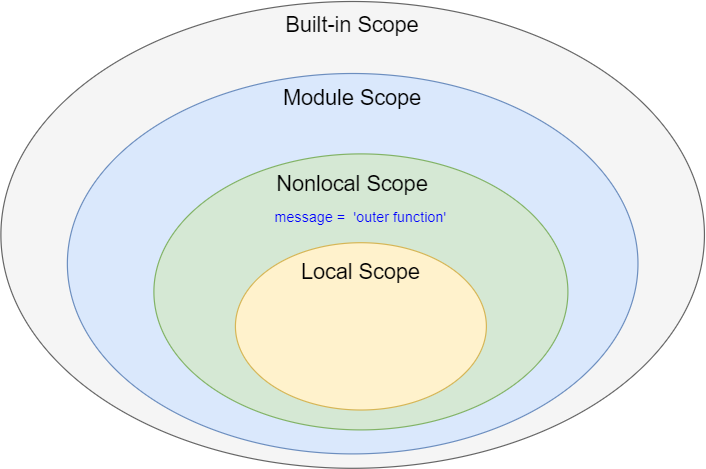

### встроенная

In [ ]:
# функция id определна в системной области видимости
id(1)

In [ ]:
# её невозможно удалить
del id

In [ ]:
# но можно переопределить
def id(a):
    return a

id(1)

In [ ]:
# и потом удалить
del id
id(1)

### локальная

In [ ]:
def func(a):
    s = 5
    return a + s

func(5)

In [ ]:
# s видна только внутри функции func
s

### нелокальная

Для взаимодействия с идентификаторами в пределах вышестоящей инструкции def используется ключевое слоово `nonlocal` 

In [ ]:
def func(a):
    f = 50
    def inner(a):
        s = 5
        f = 500
        return a + s + f
    return a + inner(a) + f

func(2)

In [ ]:
def func(a):
    f = 50
    def inner(a):
        nonlocal f  # теперь можно поменять значение внутри func
        s = 5
        f = 500
        return a + s + f
    return a + inner(a) + f

func(2)

### глобальная

Для взаимодействия с идентификаторами в пределах модуля используется ключевое слоово `gloabal` 

In [ ]:
a = 5

def func(b):
    a = 50
    return a + b

func(10)

In [ ]:
a

In [ ]:
a = 5

def func(b):
    global a
    a = 50
    return a + b

func(10)

In [ ]:
a

Но, вообще говоря, функция не должна изменять глобальные переменные модуля (не имеет на это права!).

Использование глобальных переменных - плохая тактика. Лучше использовать их только в качестве констант и на чтение.

## Вложенные функции

Функции, которые объявляются и вызываются внутри других функций, называются вложенными

На практике применяются:
- для написания декораторов
- (?редко) для сокрытия логики внутри модуля - то есть как средство инкапсуляции
- при написании рекурсивных функций
- для создания замыканий

In [ ]:
def outer_func():
    def first_inner():
        print('This is first inner function')

    def second_inner():
        print('This is second inner function')

    first_inner()
    second_inner()
    
outer_func()

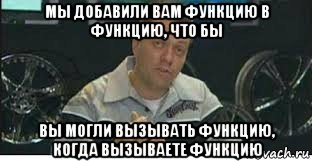

## Замыкания

Замыкание (closure) в программировании — это функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся ее параметрами. Говоря другим языком, замыкание — функция, которая ссылается на свободные переменные в своей области видимости.  

In [ ]:
# например, нам нужна функция, которая будет вычислять квадрат числа
pow(5, 2), pow(3, 2)

In [ ]:
# можно использовать вложенную функцию
def pow2(a):
    return pow(a, 2)

pow2(5), pow2(3)

Но допустим, нам нужна функция которая сможет вычислять *определённую* степень в разные моменты времени. Пример, конечно совсем синтетический:  

In [ ]:
# это пример замыкания
def pow_n(a):
    def helper(n):
        return n ** a
    return helper

pow_3 = pow_n(3)
pow_3(5), pow_3(3)

In [ ]:
pow_4 = pow_n(4)
pow_4(5), pow_4(3)

In [ ]:
pow_n(4)(4)

Замыкания являются ключём к пониманию декораторов

## Декораторы

Декоратор - это инструмент (шаблон проектирования) в Python для обертывания кода вокруг функций или классов

Синтаксис:
```python
from functools import wraps

def deco_name(deco_arg1, deco_arg2):  # это сам декоратор, его имя должно говорить о назначении декоратора
    def wrapper(fun):  # это внешняя обёртка декоратора, носит имя wrapper по соглашению
        @wraps(fun)  # это необходимо для того чтобы можно было прочитать документацию к исходной декорируемой функции
        def wrapped(*args, **kwargs): # это внутренняя обёртка декоратора, носит имя wrapped по соглашению
            """документация обёртки"""
            res = fun(*args, **kwargs)
            # тело, тут могут быть использованы deco_arg1, deco_arg2 ... deco_argN
            return res

        return wrapped

    return wrapper
```

Использование декоратора:
```python
@deco_name(deco_arg1, deco_arg2)  # так декоратор используется
def decoreted_func(func_arg1, func_arg2):  # это декорируемая функция
    """документация функции"""
    result = ...  # тело функции
    return result

var = decoreted_func(func_arg1, func_arg2)
```

Что эквивалентно:
```python
def not_decoreted_func(func_arg1, func_arg2):
    """документация функции"""
    result = ...  # тело функции
    return result

var = deco_name(deco_arg1, deco_arg2)(not_decoreted_func)(func_arg1, func_arg2)
```

Таким образом, декоратор (использование `@`) это просто "синтаксический сахар"


Применяются декораторы для того чтобы можно было изменять поведение функций и методов не меняя код самих функций, давайте рассмотрим пример:

In [ ]:
from functools import wraps

def unexcept(fun):
    """
    Этот декоратор не позволяет функции возражать исключения
    """
    @wraps(fun)
    def wrapped(*args, **kwargs):
        e = None
        try:
            res = fun(*args, **kwargs)
        except Exception as ex:
            res, e = 0, ex
        return res, e

    return wrapped



@unexcept
def div(a, b):
    """Эта функция поделит a на b"""
    return a / b

div(1, 0)

In [ ]:
div(1, 1)

In [ ]:
help(div) # документация сохранилась, так как мы использовали functools.wraps

In [ ]:
help(unexcept)

Можно обернуть нашим декоратором вообще любую функцию. При этом, менять код самих функций не надо. Пара примеров:

In [ ]:
@unexcept
def plus(a, b):
    return a + b

plus(1, '2')

In [ ]:
@unexcept
def sort(*args):
    return sorted([*args])

sort(1, 2, 1, 5, '3')

Ели бы у нас не было декораторов, пришлось бы изменять сами функции:

In [ ]:
def plus(a, b):
    e = None
    try:
        res = a + b
    except Exception as ex:
        res, e = 0, ex
    return res, e

plus(1, '2')

In [ ]:
def sort(*args):
    e = None
    try:
        res = sorted([*args])
    except Exception as ex:
        res, e = 0, ex
    return res, e

sort(1, 2, 1, 5, '3')

Представьте что таких функция не 1 и не 2, а очень много, и в какой-то момент нам бы захотелось поменять логику работы с исключениями. Без декораторов нам бы пришлось переписывать каждую функцию и тесты к ним, с декоратором нам достаточно поменять логику в одном месте (в декораторе) и может быть в тесте к декоратору

К одной функции можно применять несколько декораторов

In [ ]:
def reverse_decorator(function):
  
    def reverse_wrapper():
        make_reverse = ''.join(reversed(function()))
        return make_reverse
  
    return reverse_wrapper
  
def uppercase_decorator(function):
  
    def uppercase_wrapper():
        var_uppercase = function().upper()
        return var_uppercase
  
    return uppercase_wrapper
  
@uppercase_decorator
@reverse_decorator
def say():
    return 'привет мир'
  
say()

In [ ]:
help(say)  # документация не сохранилась, так как мы не использовали functools.wraps

In [ ]:
def say():
    return 'привет мир'

uppercase_decorator(reverse_decorator(say))()

Стандартная библиотека содержит множество декораторов:

Встроенные декораторы:
- `@classmethod`
- `@staticmethod`
- `@property`

Модуль mock (для тестирования):
- `@mock.patch`

functools:
- `@functools.cache`

dataclasses:
- `@dataclasses.dataclass`

## Документирование

Соглашения по документированию функций содержатся в документе PEP 257

